In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORTS**

In [2]:

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import os
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

2024-03-16 17:58:18.243076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 17:58:18.243179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 17:58:18.375944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Folder paths**


In [3]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


# **Train test split**


In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# **Convolutional Neural Network**

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# **MODEL DIAGRAM AND SUMMARY**

In [8]:
from keras.utils  import plot_model as pm


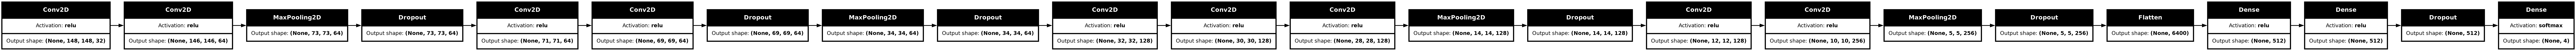

In [9]:
pm(model, show_shapes=True,show_layer_activations=True, rankdir="LR",expand_nested=True)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

# **MODEL TRAINING**

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


2024-03-16 17:59:07.836240: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.01362, expected 6.05938
2024-03-16 17:59:07.836308: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.59738, expected 5.64314
2024-03-16 17:59:07.836318: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.60386, expected 6.64961
2024-03-16 17:59:07.836326: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.47181, expected 6.51757
2024-03-16 17:59:07.836334: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.76316, expected 6.80892
2024-03-16 17:59:07.836342: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.80827, expected 5.85402
2024-03-16 17:59:07.836350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.93282, expected 5.97858
2024-03-16 17:59:07.836358: E external/local_xla/xla/se

 3/83 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2483 - loss: 264.2987 

I0000 00:00:1710611961.094649      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


81/83 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2947 - loss: 51.3882

2024-03-16 17:59:28.349363: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21904: 7.33093, expected 6.47258
2024-03-16 17:59:28.349433: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21905: 6.56388, expected 5.70552
2024-03-16 17:59:28.349450: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21906: 6.96595, expected 6.1076
2024-03-16 17:59:28.349461: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21911: 6.81833, expected 5.95998
2024-03-16 17:59:28.349470: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21912: 6.53367, expected 5.67532
2024-03-16 17:59:28.349477: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21913: 5.55052, expected 4.69217
2024-03-16 17:59:28.349485: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21914: 6.13184, expected 5.27349
2024-03-16 17:59:28.349493: 

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.2960 - loss: 50.8509

2024-03-16 17:59:40.139054: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.7183, expected 5.8081
2024-03-16 17:59:40.139116: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.5509, expected 5.64071
2024-03-16 17:59:40.139138: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.90228, expected 6.99209
2024-03-16 17:59:40.139146: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.66871, expected 6.75852
2024-03-16 17:59:40.139155: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.67524, expected 6.76505
2024-03-16 17:59:40.139163: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.44838, expected 4.53818
2024-03-16 17:59:40.139172: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.63338, expected 5.72318
2024-03-16 17:59:40.139180: E external/local_xla/xla/servi

83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 249ms/step - accuracy: 0.2966 - loss: 50.7712 - val_accuracy: 0.2857 - val_loss: 307.4870
Epoch 2/20
 3/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4792 - loss: 1.2399

W0000 00:00:1710611981.552600      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4071 - loss: 13.3664 - val_accuracy: 0.1599 - val_loss: 257.1799
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2907 - loss: 268.0479 - val_accuracy: 0.1599 - val_loss: 8396.7012
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3186 - loss: 53.5930 - val_accuracy: 0.1599 - val_loss: 2602.5891
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3184 - loss: 727.3414 - val_accuracy: 0.2891 - val_loss: 1.7475
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2831 - loss: 2110.9614 - val_accuracy: 0.2891 - val_loss: 1.8008
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2754 - loss: 137412.3594 - val_accuracy: 0.3129 - val_loss: 1.8209
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2744 - loss: 56922916.0000 - val_accuracy: 0.2755 - val_loss: 1.4609
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2712 - loss: 1335326.1250 - 

# **ACCURACY VS LOSS-FUNCTION GRAPH**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

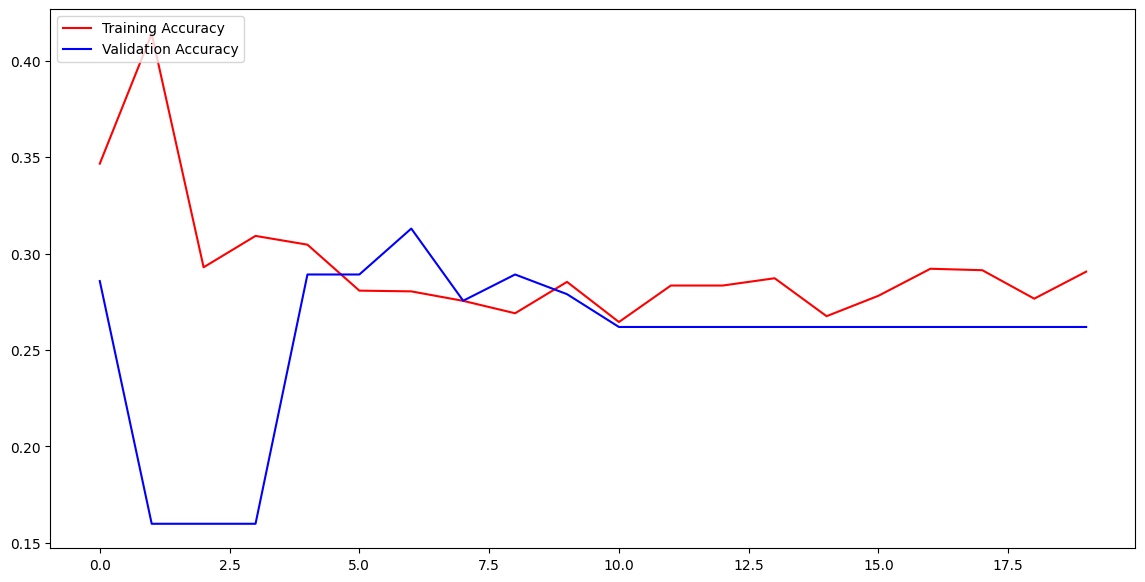

In [14]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

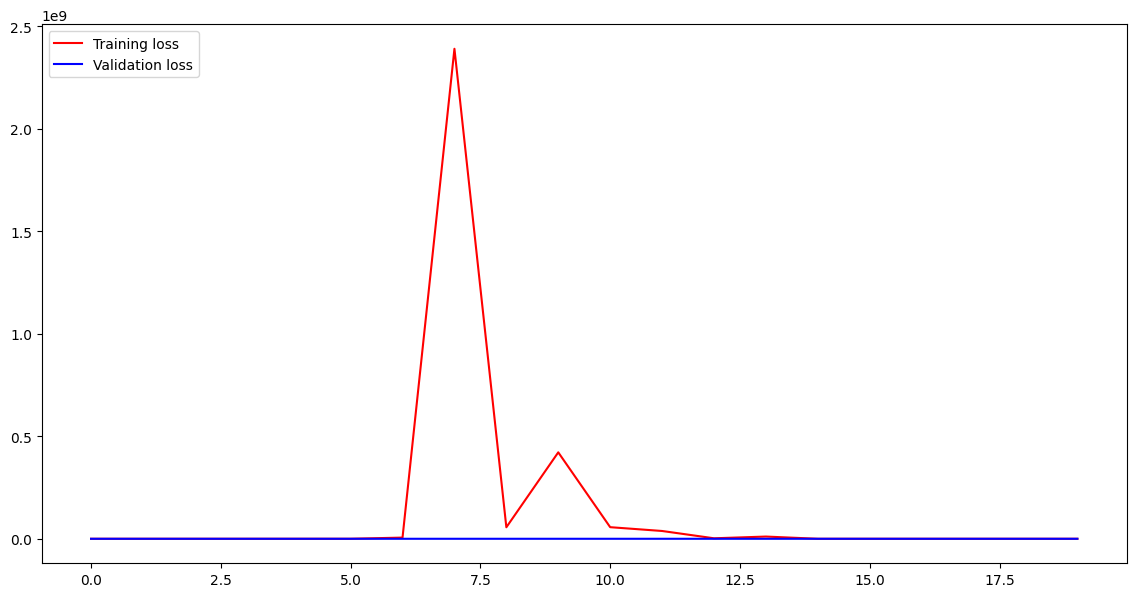

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

# **PREDICTIONS**

In [16]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [17]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

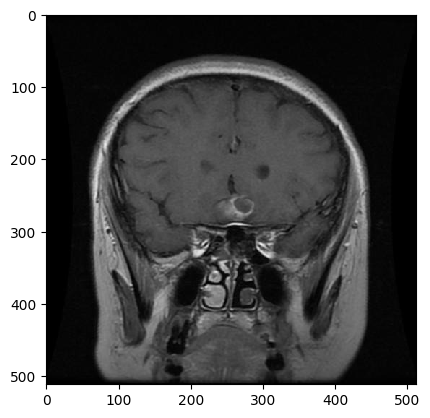

In [18]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [19]:
a=model.predict(img_array)
indices = a.argmax()
['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
if indices == 0:
    print("Gliomar Tumor.")
elif indices == 1:
    print("Meningioma Tumor")
elif indices == 3:
    print("Pituitary Tumo")
else:
    print("No Tumore. Cancer free :)")


2024-03-16 18:00:46.462113: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30560: 4.13759, expected 3.62039
2024-03-16 18:00:46.462169: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30689: 4.16181, expected 3.6446
2024-03-16 18:00:46.462249: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 40495: 4.13759, expected 3.62039
2024-03-16 18:00:46.462263: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 40624: 4.16181, expected 3.6446
2024-03-16 18:00:46.462317: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44990: 4.55328, expected 3.99621
2024-03-16 18:00:46.462347: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47010: 4.40387, expected 3.8468
2024-03-16 18:00:46.462360: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47030: 4.30735, expected 3.75029
2024-03-16 18:00:46.462383: E 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
No Tumore. Cancer free :)
